# Capstone Project-The Battle of Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

__________________________________________________________________________________________________________________________________________________________________________________________________________________________

As part of the Final Capstone Project, the course requires us to come up with a business problem and use foursquare and Machine learning techniques to solve it.

### Table of Contents
1. [Introduction: Business Problem](#Intro)
2. [Data: Requirements and collection](#Data)
3. [Methodology](#Method)
4. [Analysis](#Analysis)
5. [Results and Discussion](#Result)
6. [Conclusion](#Conclusion)


## Introduction: Business Problem <a id='Intro'></a>
### "Prospects of starting a Restaurant/Bar  by inspecting the Borough of Berlin"

Berlin is both a city and one of Germany’s federal states (city state). Since the 2001 administrative reform, it has been made up of twelve boroughs or districts, each with its own local government, though all boroughs are subject to Berlin’s city and state government.
Each borough is governed by a council with five councillors and a borough mayor . The borough council is elected by the borough assembly. The borough governments' power is limited, and subordinate to the Berlin Senate. The borough mayors form a council of mayors, which advises the Senate.
It's the largest city of Germany by both area and population. Its '3748148' inhabitants make it the second most populous city proper of the European Union after London. Area of Berlin is 891,1 sq km. Which is divided into 12 Boroughs.

While looking for places to open a business, we need to select the busiest zones in Berlin where a constant crowd is guaranteed. In a city like Berlin there will be a huge competition for businesses. Keeping this in mind, the surrounding of the selected Borough should not have a lot of similar businesses. Analyzing the office areas of the Borough, it is expected that there will be a lot of restaurants.

The Business Problem can be stated as:

#### “What is the best place to open a Restaurant in Berlin?”

<img src="https://www.irishtimes.com/polopoly_fs/1.2560676.1457115180!/image/image.jpg_gen/derivatives/box_620_330/image.jpg" alt="drawing" width="1000"/>

### Interest

Some People spend alot of time in search for perfect oppertunity and place to open a resturant in any city. Hence understanding how good a neighborhood is for business it's one of the most important thing. As the population continues to increase, cities grows with that too with more oppertunity for busnisses. A descision if takeen in pressure or without proper investigation and data can cause a lot of trouble specially in the lose of money. So finding a good location for business is crucial and time consuming process. This study will give a glimpse for selection of neighborhood for resturant.


### Target Audience:

1. The primary target audience for this project are definitely the entrepreneurs who want to open up a new business
2. Investors who want to invest in good business ideas
3. Students who are exploring Data Science and are trying to learn the art of telling a story by training, analyzing and learning from a data
 


## Data: Requirements and collection <a id='Data'></a>

*  **Zones Data** (along with Coordinates)
    * **Requirement**: There are 12 borough in Berlin. The basic data required to start this project is the names of all these Boroughs along with their coordinates
    * **Collection**: Web scape the data of Borough of Berlin using ‘BeautifulSoup’. Use ‘Python Geocoder’ to get the latitude and longitude values of these Boroughs.


*  **Professional Venue Data**
    * **Requirement**: From these 12 boroughs we need to find out which borough have the most professional venues like offices, hospitals, industries, factories etc. In other words, we need to know in which zones we will have a constant flow of people (customers).
    * **Collection**: Using ‘Foursquare’ by giving a specific category ID we can find the most frequent professional venues in these 12 boroughs.


*  **Nearby Venues Data**
    * **Requirement**: We need to have an idea about the competition before we open a business. So, we need data about the most frequent venues nearby each selected zone.
    * **Collection**: Explore the zones using ‘Foursquare’


*  **Pricing Data**
    * **Requirement**: Pricing data will help us in two ways:
By giving us an estimate of the price values if you want to buy the land or rent it for the business.
By giving us an idea about what kind of resident customers we are dealing with
    * **Collection**: Websites have pricing data for boroughs of Berlin. (It is generally difficult to find accurate pricing data.)
During the collection of data, Exploratory Data Analysis (Week2) is performed simultaneously to get more insights on it. 
Step by step lets understand the data.

* **Zones Data (along with Coordinates)**

Data about the Borough of Berlin can be obtained from this [wikipedia](https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin) page using Web scraping. BeautifulSoup is a python library used to scrape data from HTML and XML files. It works along with a parser (lxml parser is being used here).

In [69]:
#importing libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
from geopy.geocoders import Nominatim
#!pip install folium
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
#reading url
source = requests.get('https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin').text
soup = BeautifulSoup(source, 'lxml')

In [3]:
#finding table on web page and reading tables
table = soup.find('table', class_ = 'sortable wikitable')
rows = table.find_all('tr')
locations = []
for row in rows:
    col = row.find_all('td')
    col = [x.text.strip() for x in col]
    try:
        locations.append(col[0])
    except:
        locations.append(0)
del locations[0]

In [28]:
#converting into panda dataframe
df = pd.DataFrame()
df['Location'] = locations
df

,Location
0,Charlottenburg-Wilmersdorf
1,Friedrichshain-Kreuzberg
2,Lichtenberg
3,Marzahn-Hellersdorf
4,Mitte
5,Neukölln
6,Pankow
7,Reinickendorf
8,Spandau
9,Steglitz-Zehlendorf


In [29]:
#getting longitude and latitude for Berlin Boroughs
geolocator = Nominatim(user_agent="Berlin_explorer")
df['Latitude']= df['Location'].apply(geolocator.geocode).apply(lambda x: (x.latitude))
df['Longitude']= df['Location'].apply(geolocator.geocode).apply(lambda x: (x.longitude))
df

,Location,Latitude,Longitude
0,Charlottenburg-Wilmersdorf,52.507856,13.263952
1,Friedrichshain-Kreuzberg,52.515306,13.461612
2,Lichtenberg,52.532161,13.511893
3,Marzahn-Hellersdorf,52.522523,13.587663
4,Mitte,52.517690,13.402376
5,Neukölln,52.481150,13.435350
6,Pankow,52.597663,13.436351
7,Reinickendorf,52.604763,13.295287
8,Spandau,52.519267,13.195439
9,Steglitz-Zehlendorf,52.429205,13.229974


In [12]:
#Berlin Lat long
Berlin_centre =[52.5200, 13.4050]

berlin_Boroughs = folium.Map(location=Berlin_centre, zoom_start=12)
folium.Marker(Berlin_centre, popup='Berlin').add_to(berlin_Boroughs)
# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], 
                           df['Location']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='blue',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7).add_to(berlin_Boroughs)  
    
berlin_Boroughs

In [13]:
# @hidden_cell

#Define Foursquare Credentials and Version
CLIENT_ID = 'XDP05EROIGY2VHJ3RZNRVGCEECJKCBAV0L4JMC4F4SCL0NAF' # your Foursquare ID
CLIENT_SECRET = 'XHKK22SSQYX0REMVWFGNG3GTY5I2HGPPOUERFOEFPIR0YPNO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [33]:
Professional_category = '4d4b7105d754a06375d81259'
RADIUS = 1000
LIMIT = 100

def getNearbyProfVenues(names, latitudes, longitudes, radius=RADIUS):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            Professional_category,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        try:    
        # make the GET request
            results = requests.get(url).json()["response"]['venues']
        
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            results = requests.get(url).json()
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zone(Location)', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
        
    return(nearby_venues)

In [34]:
Berlin_Zones_ProfVenues = getNearbyProfVenues(names=df['Location'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

In [35]:
Berlin_Zones_ProfVenues

,Zone(Location),Latitude,Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Charlottenburg-Wilmersdorf,52.507856,13.263952,Türkisches Generalkonsulat | Turkish Consulate...,52.508640,13.265315,Embassy / Consulate
1,Charlottenburg-Wilmersdorf,52.507856,13.263952,Strabag Residential Property Services,52.509010,13.263502,Office
2,Charlottenburg-Wilmersdorf,52.507856,13.263952,Messe Berlin,52.503618,13.272386,Convention Center
3,Charlottenburg-Wilmersdorf,52.507856,13.263952,International Club Berlin,52.506732,13.270823,Club House
4,Charlottenburg-Wilmersdorf,52.507856,13.263952,Berliner Funkturm,52.505036,13.278152,Scenic Lookout
5,Charlottenburg-Wilmersdorf,52.507856,13.263952,Media Center | Messe Berlin,52.503294,13.272789,Conference Room
6,Charlottenburg-Wilmersdorf,52.507856,13.263952,Halle 1 | Messe Berlin,52.502458,13.269725,Convention Center
7,Charlottenburg-Wilmersdorf,52.507856,13.263952,Apollo-Optik,52.510365,13.270236,Optical Shop
8,Charlottenburg-Wilmersdorf,52.507856,13.263952,Halle 4 | Messe Berlin,52.502177,13.271963,Convention Center
9,Charlottenburg-Wilmersdorf,52.507856,13.263952,Halle 3 | Messe Berlin,52.503035,13.270363,Convention Center


In [36]:
Berlin_Zones_ProfVenues.shape

(456, 7)

In [37]:
df_prof_venues = pd.DataFrame(Berlin_Zones_ProfVenues['Venue_Category'].value_counts())

df_prof_venues = df_prof_venues.reset_index()
df_prof_venues.columns = ['Venue_Category','Count']
df_prof_venues

,Venue_Category,Count
0,Office,64
1,Doctor's Office,44
2,Convention Center,25
3,Dentist's Office,22
4,Building,20
5,Coworking Space,19
6,Medical Center,18
7,Tech Startup,17
8,Post Office,14
9,Church,13


In [38]:
df_count = pd.DataFrame(Berlin_Zones_ProfVenues['Zone(Location)'].value_counts())
df_count = df_count.reset_index()
df_count.columns = ['Zone(Location)','Count']
df_count

,Zone(Location),Count
0,Mitte,50
1,Friedrichshain-Kreuzberg,50
2,Neukölln,50
3,Charlottenburg-Wilmersdorf,49
4,Tempelhof-Schöneberg,48
5,Marzahn-Hellersdorf,43
6,Steglitz-Zehlendorf,43
7,Spandau,41
8,Lichtenberg,39
9,Pankow,24


In [39]:
zone_list = list(df_count['Zone(Location)'][0:6])
Selected_zones_df = df.loc[df['Location'].isin(zone_list)]
Selected_zones_df = Selected_zones_df.sort_values(by=['Location'])
Selected_zones_df = Selected_zones_df.reset_index(drop=True)

Selected_zones_df

,Location,Latitude,Longitude
0,Charlottenburg-Wilmersdorf,52.507856,13.263952
1,Friedrichshain-Kreuzberg,52.515306,13.461612
2,Marzahn-Hellersdorf,52.522523,13.587663
3,Mitte,52.517690,13.402376
4,Neukölln,52.481150,13.435350
5,Tempelhof-Schöneberg,52.440603,13.373703


In [41]:
#Berlin Lat long
Berlin_centre =[52.5200, 13.4050]

Berlin_6Zones = folium.Map(location=Berlin_centre, zoom_start=12)
folium.Marker(Berlin_centre, popup='Berlin').add_to(Berlin_6Zones)
# add markers to map
for lat, lng, label in zip(Selected_zones_df['Latitude'], Selected_zones_df['Longitude'], 
                           Selected_zones_df['Location']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='blue',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7).add_to(Berlin_6Zones)  
    
Berlin_6Zones

* **Nearby Venues Data**

Like we did early, lets use foursquare to explore 1km around the selected zones and collect venue details.

In [42]:
def getNearbyVenues(names, latitudes, longitudes, radius=RADIUS):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zone(Location)', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
        
    return(nearby_venues)

In [43]:
Berlin_6Zones_Venues = getNearbyVenues(names=Selected_zones_df['Location'],
                                   latitudes=Selected_zones_df['Latitude'],
                                   longitudes=Selected_zones_df['Longitude']
                                  )

Use the venue details to create a Dataframe.

In [44]:
Berlin_6Zones_Venues.head()

,Zone(Location),Latitude,Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Charlottenburg-Wilmersdorf,52.507856,13.263952,Die Wühlmäuse,52.508900,13.271314,Comedy Club
1,Charlottenburg-Wilmersdorf,52.507856,13.263952,Adik's Stehcafe,52.507889,13.258131,Café
2,Charlottenburg-Wilmersdorf,52.507856,13.263952,Block House,52.509393,13.270958,Steakhouse
3,Charlottenburg-Wilmersdorf,52.507856,13.263952,Rasas,52.512100,13.264464,Indian Restaurant
4,Charlottenburg-Wilmersdorf,52.507856,13.263952,Hotel Villa Kastania,52.510310,13.268223,Hotel


In [45]:
Berlin_6Zones_Venues.shape

(388, 7)

In [46]:
df_venue = pd.DataFrame(Berlin_6Zones_Venues['Venue_Category'].value_counts()[0:10])
df_venue = df_venue.reset_index()
df_venue.columns=['Venue_Category', 'Count']

df_venue

,Venue_Category,Count
0,Café,28
1,Bar,20
2,Coffee Shop,18
3,Hotel,17
4,Pizza Place,14
5,Supermarket,11
6,Plaza,9
7,German Restaurant,9
8,Ice Cream Shop,9
9,Italian Restaurant,8


We can see that 'Cafe' are the most frequent venues in the zones. To get a better understanding let's plot a Bar graph for this data.

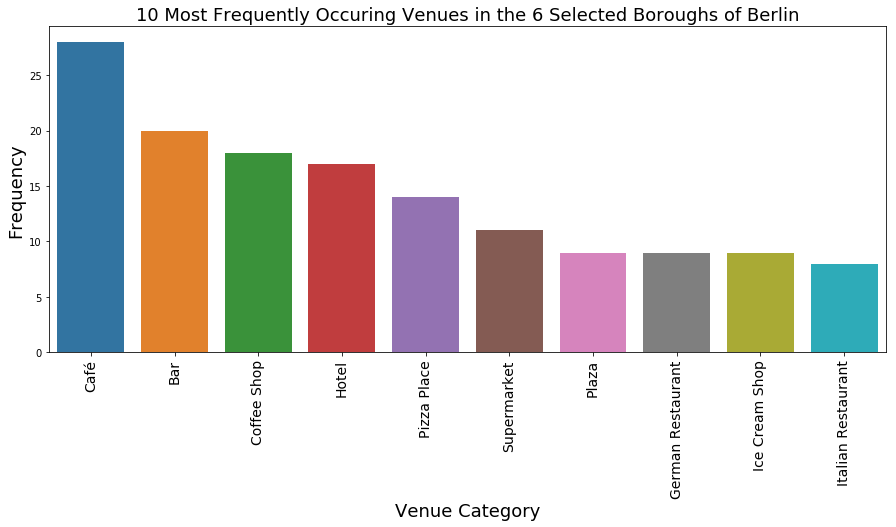

In [48]:
fig = plt.figure(figsize=(15,6
                         ))
s=sns.barplot(x="Venue_Category", y="Count", data=df_venue)
s.set_xticklabels(s.get_xticklabels(), rotation=90,fontsize=14)

plt.title('10 Most Frequently Occuring Venues in the 6 Selected Boroughs of Berlin', fontsize=18)
plt.xlabel("Venue Category", fontsize=18)
plt.ylabel ("Frequency", fontsize=18)

plt.show()

In [49]:
Berlin_6zones_Venues_only_restaurant = Berlin_6Zones_Venues[Berlin_6Zones_Venues['Venue_Category'].str.contains('Restaurant')].reset_index(drop=True)
Berlin_6zones_Venues_only_restaurant.head()

,Zone(Location),Latitude,Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Charlottenburg-Wilmersdorf,52.507856,13.263952,Rasas,52.512100,13.264464,Indian Restaurant
1,Charlottenburg-Wilmersdorf,52.507856,13.263952,Lindenwirtin,52.510335,13.271707,German Restaurant
2,Charlottenburg-Wilmersdorf,52.507856,13.263952,Piccolo Mondo,52.512355,13.267806,Italian Restaurant
3,Charlottenburg-Wilmersdorf,52.507856,13.263952,Mateo-Looi Sushi Restaurant,52.511530,13.268428,Chinese Restaurant
4,Charlottenburg-Wilmersdorf,52.507856,13.263952,Prime Kebap,52.510262,13.271246,Falafel Restaurant


In [50]:
df_venue_rest = pd.DataFrame(Berlin_6zones_Venues_only_restaurant['Venue_Category'].value_counts()[0:10])
df_venue_rest = df_venue_rest.reset_index()
df_venue_rest.columns = ['Restaurant', 'Count']
df_venue_rest.head()

,Restaurant,Count
0,German Restaurant,9
1,Italian Restaurant,8
2,Vegetarian / Vegan Restaurant,7
3,Falafel Restaurant,7
4,Thai Restaurant,5


German Restaurants are the most frequent restaurants in the zones which implies that people prefer eating German food in these areas.

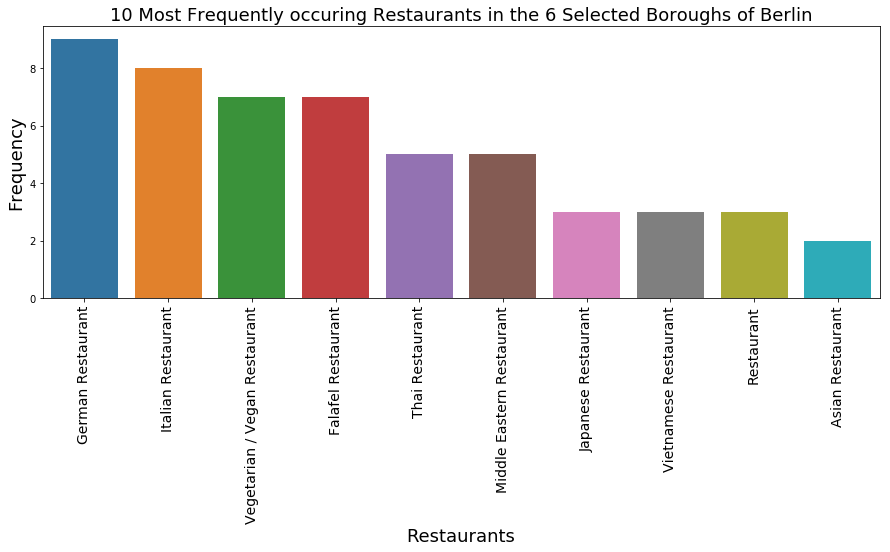

In [51]:
fig = plt.figure(figsize=(15,5))
plot=sns.barplot(x="Restaurant", y="Count", data=df_venue_rest)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90,fontsize=14)

plt.title('10 Most Frequently occuring Restaurants in the 6 Selected Boroughs of Berlin', fontsize=18)
plt.xlabel("Restaurants", fontsize=18)
plt.ylabel ("Frequency", fontsize=18)

plt.show()

In [52]:
Berlin_6zones_Venues_only_restaurant['Zone(Location)'].value_counts()

Friedrichshain-Kreuzberg      31
Neukölln                      22
Charlottenburg-Wilmersdorf    11
Mitte                          6
Tempelhof-Schöneberg           3
Marzahn-Hellersdorf            1
Name: Zone(Location), dtype: int64

Most of the restaurants are located in 'Friedrichshain-Kreuzberg'. 

Lets visualize this on a folium map.

In [55]:
Berlin_6zones_restaurants = folium.Map(location=Berlin_centre, zoom_start=12)
folium.Marker(Berlin_centre, popup='Berlin').add_to(Berlin_6zones_restaurants)

zone_list = ['Friedrichshain-Kreuzberg', 'Neukölln', 'Charlottenburg-Wilmersdorf', 'Mitte', 'Tempelhof-Schöneberg', 'Marzahn-Hellersdorf']

colors = ['blue', 'red','black','green' ,'magenta','maroon']


for lat, long, poi, zone in zip(Berlin_6zones_Venues_only_restaurant['Venue_Lat'], 
                                  Berlin_6zones_Venues_only_restaurant['Venue_Long'], 
                                  Berlin_6zones_Venues_only_restaurant['Venue_Category'], 
                                  Berlin_6zones_Venues_only_restaurant['Zone(Location)']):
    label = folium.Popup(str(zone), parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color=colors[zone_list.index(zone)],
        fill=True,
        fill_color=colors[zone_list.index(zone)],
        fill_opacity=0.3).add_to(Berlin_6zones_restaurants)

Berlin_6zones_restaurants

* **Pricing Data**

Average price per sqft in each selected zone is taken manually from this [website.](https://www.firstcitiz.com/about-berlin/berlin-property-prices.html)

In [56]:
avg_price_per_sqft = {'Friedrichshain-Kreuzberg':5000,'Neukölln':4500,'Charlottenburg-Wilmersdorf': 4500,'Mitte':5800,'Tempelhof-Schöneberg':4500,'Marzahn-Hellersdorf':3000}
avg_price_df= pd.DataFrame.from_dict(avg_price_per_sqft, orient='index')
avg_price_df = avg_price_df.reset_index()
avg_price_df.columns=['Location', 'Avg Price per sqft']

avg_price_df

,Location,Avg Price per sqft
0,Friedrichshain-Kreuzberg,5000
1,Neukölln,4500
2,Charlottenburg-Wilmersdorf,4500
3,Mitte,5800
4,Tempelhof-Schöneberg,4500
5,Marzahn-Hellersdorf,3000


To make more sense of the data, lets plot a bar plot of the data.

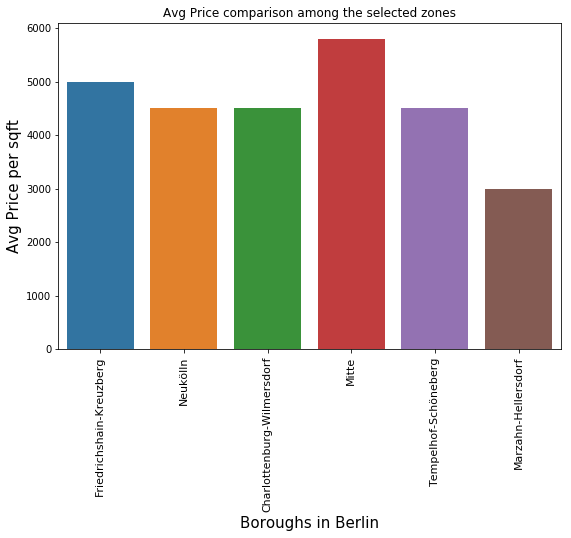

In [57]:
fig = plt.figure(figsize=(9,6))
price_bar = sns.barplot(x='Location',y ='Avg Price per sqft',data=avg_price_df)
price_bar.set_xticklabels(price_bar.get_xticklabels(), rotation=90, fontsize=11)
plt.xlabel('Boroughs in Berlin',fontsize=15)
plt.ylabel('Avg Price per sqft',fontsize=15)
plt.title('Avg Price comparison among the selected zones')

plt.show()

Merge this data into the selected zones data

In [58]:
df_cd = pd.merge(Selected_zones_df, avg_price_df, how='right', on = 'Location')
df_cd

,Location,Latitude,Longitude,Avg Price per sqft
0,Charlottenburg-Wilmersdorf,52.507856,13.263952,4500
1,Friedrichshain-Kreuzberg,52.515306,13.461612,5000
2,Marzahn-Hellersdorf,52.522523,13.587663,3000
3,Mitte,52.517690,13.402376,5800
4,Neukölln,52.481150,13.435350,4500
5,Tempelhof-Schöneberg,52.440603,13.373703,4500


## Methodology <a id='Method'></a>


This project requires us to find the business or professional boroughs of Berlin and explore these boroughs to find out the frequent venues of these boroughs. All of these is done so that we choose a borough which has more demand for our new business 
Firstly, we have collected all the required data and have done some exploratory data analysis to find the top 6 professional Boroughs of Berlin based on the professional venues’ frequency in that borough. We found that the most frequent Professional Venue in all the boroughs combined is an "Office". Frequent venues were explored in these selected zones and it was found that venue category of "German Restaurant" is the most frequent venue nearby these selected zones. From this it is clear who our potential customers are and what they prefer.
Secondly, we need to analyze the data a little more to get insights into the venue category. This can be done by using one-hot encoding. Thirdly. We will use a machine learning method called K-Means Cluster to cluster the zones into groups depending how similar or dissimilar they are.

## Analysis <a id='Analysis'></a>

First, let's make a dataframe which contains the selected boroughs and their nearby professional venues.

In [59]:
prof_venue_list = list(df_prof_venues['Venue_Category'])
Selected_venues_df = Berlin_Zones_ProfVenues[Berlin_Zones_ProfVenues['Venue_Category'].isin(prof_venue_list)]
Selected_venues_df = Selected_venues_df[Selected_venues_df['Zone(Location)'].isin(zone_list)]
Selected_venues_df = Selected_venues_df.sort_values(by=['Zone(Location)'])
Selected_venues_df = Selected_venues_df.reset_index(drop=True)

Selected_venues_df.head()

,Zone(Location),Latitude,Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Charlottenburg-Wilmersdorf,52.507856,13.263952,Türkisches Generalkonsulat | Turkish Consulate...,52.508640,13.265315,Embassy / Consulate
1,Charlottenburg-Wilmersdorf,52.507856,13.263952,Malteser Krankenhaus,52.508934,13.251894,Hospital
2,Charlottenburg-Wilmersdorf,52.507856,13.263952,Halle 10 | Messe Berlin,52.504018,13.275767,Convention Center
3,Charlottenburg-Wilmersdorf,52.507856,13.263952,CityCube Berlin,52.500235,13.270841,Convention Center
4,Charlottenburg-Wilmersdorf,52.507856,13.263952,Halle 9 | Messe Berlin,52.502910,13.276003,Convention Center


One hot encoding is done on the venue categories to better understand them.

In [60]:
Berlin_6Zones_profVenues_onehot = pd.get_dummies(Selected_venues_df[['Venue_Category']], prefix="", prefix_sep="")

#add district column back to dataframe
Berlin_6Zones_profVenues_onehot['Zone(Location)'] = Selected_venues_df['Zone(Location)'] 
#move district column to the first column
fixed_columns = [Berlin_6Zones_profVenues_onehot.columns[-1]] + list(Berlin_6Zones_profVenues_onehot.columns[:-1])
Berlin_6Zones_profVenues_onehot = Berlin_6Zones_profVenues_onehot[fixed_columns]

Berlin_6Zones_profVenues_onehot.head()

,Zone(Location),Adult Education Center,Advertising Agency,Auditorium,Bar,Buddhist Temple,Building,Business Center,Café,Campaign Office,...,Scenic Lookout,School,Shopping Mall,Social Club,Synagogue,TV Station,Tech Startup,Veterinarian,Warehouse,Winery
0,Charlottenburg-Wilmersdorf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Charlottenburg-Wilmersdorf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Charlottenburg-Wilmersdorf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Charlottenburg-Wilmersdorf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Charlottenburg-Wilmersdorf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
Berlin_6Zones_profVenues_Grouped = Berlin_6Zones_profVenues_onehot.groupby('Zone(Location)').mean().reset_index()

Berlin_6Zones_profVenues_Grouped.head()

,Zone(Location),Adult Education Center,Advertising Agency,Auditorium,Bar,Buddhist Temple,Building,Business Center,Café,Campaign Office,...,Scenic Lookout,School,Shopping Mall,Social Club,Synagogue,TV Station,Tech Startup,Veterinarian,Warehouse,Winery
0,Charlottenburg-Wilmersdorf,0.00,0.00,0.040816,0.00,0.00,0.000000,0.00,0.00,0.00,...,0.020408,0.000000,0.00,0.020408,0.00,0.020408,0.00,0.000000,0.0,0.00
1,Friedrichshain-Kreuzberg,0.00,0.00,0.000000,0.02,0.02,0.000000,0.02,0.00,0.00,...,0.000000,0.020000,0.00,0.000000,0.00,0.000000,0.10,0.000000,0.0,0.02
2,Marzahn-Hellersdorf,0.00,0.00,0.000000,0.00,0.00,0.023256,0.00,0.00,0.00,...,0.000000,0.046512,0.00,0.000000,0.00,0.000000,0.00,0.046512,0.0,0.00
3,Mitte,0.00,0.02,0.000000,0.00,0.00,0.100000,0.00,0.00,0.00,...,0.020000,0.000000,0.00,0.000000,0.02,0.000000,0.16,0.000000,0.0,0.00
4,Neukölln,0.02,0.00,0.000000,0.00,0.00,0.020000,0.02,0.02,0.02,...,0.000000,0.000000,0.02,0.000000,0.00,0.000000,0.04,0.000000,0.0,0.00


Let's now find the top 5 frequent venues in all the selected zone.

In [62]:
num_top_venues = 5

for places in Berlin_6Zones_profVenues_Grouped['Zone(Location)']:
    print("========="+places+"=========")
    temp = Berlin_6Zones_profVenues_Grouped[Berlin_6Zones_profVenues_Grouped['Zone(Location)'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

=========Charlottenburg-Wilmersdorf=========
               Venue  Freq
0  Convention Center  0.43
1             Office  0.08
2  Elementary School  0.06
3         Auditorium  0.04
4             Church  0.04


=========Friedrichshain-Kreuzberg=========
             Venue  Freq
0           Office  0.16
1  Doctor's Office  0.12
2     Tech Startup  0.10
3      Post Office  0.08
4  Language School  0.06


=========Marzahn-Hellersdorf=========
                         Venue  Freq
0              Doctor's Office  0.23
1               Medical Center  0.09
2                  Post Office  0.07
3                       Office  0.07
4  Professional & Other Places  0.05


=========Mitte=========
                 Venue  Freq
0               Office  0.16
1         Tech Startup  0.16
2             Building  0.10
3  Monument / Landmark  0.08
4      Language School  0.06


=========Neukölln=========
             Venue  Freq
0  Coworking Space  0.18
1  Doctor's Office  0.08
2  Language School  0.06
3      

Doing the same for other nearby venues.

In [63]:
Berlin_6Zones_Venues_onehot = pd.get_dummies(Berlin_6Zones_Venues[['Venue_Category']], prefix="", prefix_sep="")

#add district column back to dataframe
Berlin_6Zones_Venues_onehot['Zone(Location)'] = Berlin_6Zones_Venues['Zone(Location)'] 
#move district column to the first column
fixed_columns = [Berlin_6Zones_Venues_onehot.columns[-1]] + list(Berlin_6Zones_Venues_onehot.columns[:-1])
Berlin_6Zones_Venues_onehot = Berlin_6Zones_Venues_onehot[fixed_columns]

Berlin_6Zones_Venues_onehot.head()

,Zone(Location),African Restaurant,Art Gallery,Art Museum,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Beach Bar,...,Trail,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Charlottenburg-Wilmersdorf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Charlottenburg-Wilmersdorf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Charlottenburg-Wilmersdorf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Charlottenburg-Wilmersdorf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Charlottenburg-Wilmersdorf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
Berlin_6Zones_Venues_Grouped = Berlin_6Zones_Venues_onehot.groupby('Zone(Location)').mean().reset_index()

Berlin_6Zones_Venues_Grouped.head()

,Zone(Location),African Restaurant,Art Gallery,Art Museum,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Beach Bar,...,Trail,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Charlottenburg-Wilmersdorf,0.00,0.00,0.021739,0.00,0.00,0.00,0.021739,0.021739,0.00,...,0.000000,0.021739,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Friedrichshain-Kreuzberg,0.01,0.00,0.000000,0.01,0.01,0.01,0.000000,0.060000,0.00,...,0.000000,0.000000,0.00,0.04,0.02,0.02,0.01,0.01,0.01,0.01
2,Marzahn-Hellersdorf,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,...,0.058824,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Mitte,0.00,0.03,0.030000,0.00,0.00,0.00,0.000000,0.010000,0.01,...,0.000000,0.000000,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00
4,Neukölln,0.01,0.02,0.000000,0.00,0.00,0.02,0.000000,0.120000,0.00,...,0.000000,0.000000,0.02,0.02,0.01,0.01,0.02,0.00,0.00,0.01


In [65]:
num_top_venues = 5

for places in Berlin_6Zones_Venues_Grouped['Zone(Location)']:
    print("========="+places+"=========")
    temp = Berlin_6Zones_Venues_Grouped[Berlin_6Zones_Venues_Grouped['Zone(Location)'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))

=========Charlottenburg-Wilmersdorf=========
                Venue  Freq
0                Café  0.11
1  Italian Restaurant  0.07
2   German Restaurant  0.07
3               Plaza  0.04
4         Gas Station  0.04
=========Friedrichshain-Kreuzberg=========
                Venue  Freq
0                Café  0.12
1         Pizza Place  0.08
2                 Bar  0.06
3  Falafel Restaurant  0.05
4         Coffee Shop  0.05
=========Marzahn-Hellersdorf=========
              Venue  Freq
0       Supermarket  0.41
1         Drugstore  0.12
2              Pool  0.06
3             Trail  0.06
4  Doner Restaurant  0.06
=========Mitte=========
            Venue  Freq
0           Hotel  0.16
1  History Museum  0.05
2           Plaza  0.04
3     Art Gallery  0.03
4     Coffee Shop  0.03
=========Neukölln=========
                Venue  Freq
0                 Bar  0.12
1         Coffee Shop  0.10
2                Café  0.09
3        Cocktail Bar  0.04
4  Italian Restaurant  0.04
=========Tempelhof-

Lets make the above analysis into a Dataframe.

In [66]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Lets take the top 10 most common venues in the selected zones for making this Dataframe.

In [68]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Berlin_6zones_top10_venues_sorted = pd.DataFrame(columns=columns)
Berlin_6zones_top10_venues_sorted['Location'] = Berlin_6Zones_Venues_Grouped['Zone(Location)']

for ind in np.arange(Berlin_6Zones_Venues_Grouped.shape[0]):
    Berlin_6zones_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Berlin_6Zones_Venues_Grouped.iloc[ind, :], num_top_venues)


Berlin_6zones_top10_venues_sorted

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlottenburg-Wilmersdorf,Café,Italian Restaurant,German Restaurant,Pizza Place,Plaza,Bus Stop,Gas Station,Sandwich Place,Souvenir Shop,Japanese Restaurant
1,Friedrichshain-Kreuzberg,Café,Pizza Place,Bar,Falafel Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Ice Cream Shop,Thai Restaurant,Middle Eastern Restaurant,Wine Bar
2,Marzahn-Hellersdorf,Supermarket,Drugstore,Metro Station,Trail,Shopping Mall,Bus Stop,Miscellaneous Shop,Doner Restaurant,Pool,Plaza
3,Mitte,Hotel,History Museum,Plaza,Art Gallery,Art Museum,Museum,Coffee Shop,Ice Cream Shop,Park,Indie Theater
4,Neukölln,Bar,Coffee Shop,Café,Italian Restaurant,Cocktail Bar,Pizza Place,Food & Drink Shop,Middle Eastern Restaurant,Indie Movie Theater,Bakery
5,Tempelhof-Schöneberg,Bakery,Bus Stop,Supermarket,Steakhouse,Climbing Gym,German Restaurant,Flower Shop,Metro Station,Motorcycle Shop,Storage Facility


Let's cluster these zones based on the common venues using K-Means Clustering 
To decide the number of clusters lets use the Elbow method.

In [70]:
Berlin_Clustering = Berlin_6Zones_Venues_Grouped.drop('Zone(Location)', 1)

sum_squared_dist=[]
K = range(1,7)
for k in K:
    km = KMeans(init= 'k-means++',n_clusters=k, n_init=12, random_state=4)
    km = km.fit(Berlin_Clustering)
    sum_squared_dist.append(km.inertia_)

print(sum_squared_dist)

[0.31315421166353785, 0.14868287334593575, 0.07631899810964082, 0.035758916194076874, 0.011300000000000001, 0.0]


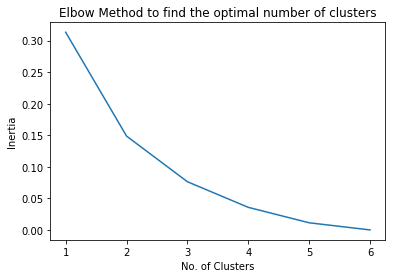

In [71]:
a = list(range(1,len(sum_squared_dist)+1))
plt.plot(a,sum_squared_dist)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to find the optimal number of clusters')
plt.show()

Here, least inertia value is required for a K-Means Clustering method. Hence 4 clusters can be used as the Elbow point.

In [72]:
clusters = 4

kmeans_cluster = KMeans(init= 'k-means++',n_clusters=clusters, n_init=12, random_state=4).fit(Berlin_Clustering)

kmeans_cluster.labels_

array([1, 1, 2, 3, 1, 0], dtype=int32)

In [73]:
Berlin_df_merged = pd.merge(Berlin_6zones_top10_venues_sorted,df_cd, how ='inner',on = 'Location')
Berlin_df_merged['Cluster Label'] = kmeans_cluster.labels_
Berlin_df_merged

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude,Avg Price per sqft,Cluster Label
0,Charlottenburg-Wilmersdorf,Café,Italian Restaurant,German Restaurant,Pizza Place,Plaza,Bus Stop,Gas Station,Sandwich Place,Souvenir Shop,Japanese Restaurant,52.507856,13.263952,4500,1
1,Friedrichshain-Kreuzberg,Café,Pizza Place,Bar,Falafel Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Ice Cream Shop,Thai Restaurant,Middle Eastern Restaurant,Wine Bar,52.515306,13.461612,5000,1
2,Marzahn-Hellersdorf,Supermarket,Drugstore,Metro Station,Trail,Shopping Mall,Bus Stop,Miscellaneous Shop,Doner Restaurant,Pool,Plaza,52.522523,13.587663,3000,2
3,Mitte,Hotel,History Museum,Plaza,Art Gallery,Art Museum,Museum,Coffee Shop,Ice Cream Shop,Park,Indie Theater,52.517690,13.402376,5800,3
4,Neukölln,Bar,Coffee Shop,Café,Italian Restaurant,Cocktail Bar,Pizza Place,Food & Drink Shop,Middle Eastern Restaurant,Indie Movie Theater,Bakery,52.481150,13.435350,4500,1
5,Tempelhof-Schöneberg,Bakery,Bus Stop,Supermarket,Steakhouse,Climbing Gym,German Restaurant,Flower Shop,Metro Station,Motorcycle Shop,Storage Facility,52.440603,13.373703,4500,0


**Cluster 1**

In [74]:
Berlin_cluster_1 = Berlin_df_merged.loc[Berlin_df_merged['Cluster Label'] == 0,Berlin_df_merged.columns[[0]+[1]+[2]+[3]+list(range(11, Berlin_df_merged.shape[1]))]]
Berlin_cluster_1

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Latitude,Longitude,Avg Price per sqft,Cluster Label
5,Tempelhof-Schöneberg,Bakery,Bus Stop,Supermarket,52.440603,13.373703,4500,0


**Cluster 2**

In [75]:
Berlin_cluster_2 = Berlin_df_merged.loc[Berlin_df_merged['Cluster Label'] == 1, Berlin_df_merged.columns[[0]+[1]+[2]+[3] + list(range(11, Berlin_df_merged.shape[1]))]]
Berlin_cluster_2

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Latitude,Longitude,Avg Price per sqft,Cluster Label
0,Charlottenburg-Wilmersdorf,Café,Italian Restaurant,German Restaurant,52.507856,13.263952,4500,1
1,Friedrichshain-Kreuzberg,Café,Pizza Place,Bar,52.515306,13.461612,5000,1
4,Neukölln,Bar,Coffee Shop,Café,52.481150,13.435350,4500,1


**Cluster 3**

In [76]:
Berlin_cluster_3 = Berlin_df_merged.loc[Berlin_df_merged['Cluster Label'] == 2, Berlin_df_merged.columns[[0]+[1]+[2]+[3] + list(range(11, Berlin_df_merged.shape[1]))]]
Berlin_cluster_3

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Latitude,Longitude,Avg Price per sqft,Cluster Label
2,Marzahn-Hellersdorf,Supermarket,Drugstore,Metro Station,52.522523,13.587663,3000,2


**Cluster 4**

In [77]:
Berlin_cluster_4 = Berlin_df_merged.loc[Berlin_df_merged['Cluster Label'] == 3, Berlin_df_merged.columns[[0]+[1]+[2]+[3] + list(range(11, Berlin_df_merged.shape[1]))]]
Berlin_cluster_4

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Latitude,Longitude,Avg Price per sqft,Cluster Label
3,Mitte,Hotel,History Museum,Plaza,52.51769,13.402376,5800,3


Let's represent these clusters on the map.

In [78]:
Berlin_clusters = folium.Map(location=Berlin_centre, zoom_start=12)
folium.Marker(Berlin_centre, popup='Berlin').add_to(Berlin_clusters)

colors = ['blue', 'green','black','yellow' ,'red','magenta','orange','darkblue']

for lat, lon, poi, cluster in zip(Berlin_df_merged['Latitude'], 
                                  Berlin_df_merged['Longitude'], 
                                  Berlin_df_merged['Location'], 
                                  Berlin_df_merged['Cluster Label']):

    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=cluster*5+10,
        popup=label,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster+4],
        fill_opacity=0.5).add_to(Berlin_clusters)
       
Berlin_clusters

Form a dataframe to come up with names for the clusters

In [79]:
df_final = Berlin_df_merged[['Location','Cluster Label','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','Avg Price per sqft']].sort_values(by='Cluster Label')
df_final['Cluster Label'] = [1,2,2,2,3,4]
df_final

,Location,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Avg Price per sqft
5,Tempelhof-Schöneberg,1,Bakery,Bus Stop,Supermarket,4500
0,Charlottenburg-Wilmersdorf,2,Café,Italian Restaurant,German Restaurant,4500
1,Friedrichshain-Kreuzberg,2,Café,Pizza Place,Bar,5000
4,Neukölln,2,Bar,Coffee Shop,Café,4500
2,Marzahn-Hellersdorf,3,Supermarket,Drugstore,Metro Station,3000
3,Mitte,4,Hotel,History Museum,Plaza,5800



##  Results and Discussion <a id='Result'></a>
### Results
* Cluster Results Analysis

    * Cluster 1 contains zones whose common venues are not restaurants
    * Cluster 2 contains zones with top 2 most common venues being restaurants
    * Cluster 3 contains zones with whose common venues are of other categories
    * Cluster 4 again contains zones whose common venues are of other categories
    
* Cafe or Bars are the most frequent venues near the selected Borough.

* 'Marzahn-Hellersdorf' has the least average price per sqf.

### Discussion

Based on the clustering and exploratory data analysis it can be seen that with maximum frequency touristic places are in the area ‘Mitte’ seems like a potential zone to open up our Restaurant or Cafe or Bar. The pricing data also seems less favorable to this due to many other comercial buildings in the area. Clustering also shows these venues in cluster 2 which represents the cluster with restaurants as the frequent venues. 
Although the results seem promising as Mitte is an area with a lot of touristic places in the city of Berlin, further analysis needs to be done based on the wards in these Boroughs to get a more accurate location to open up the business. Since the clustering is done based on only the common venues obtained from Foursquare the results will need more refining. But this preliminary analysis will be of great help in the beginning stages of the business plan.

## Conclusion<a id='Conclusion'></a>

The main objective of this project was to understand how to deal with real life data science projects using some of the popular Python packages such as seaborn, folium, BeautifulSoup and geocoders. I have also got a glimpse of how web scraping is done and how FourSquare can be used to acquire data of frequent venues in a selected area.

The idea of opening a Restaurant or Cafe or Bar in an area which has a hub for touristic places is an interesting and a potential idea to try in Berlin. Although the analysis is very preliminary and requires a lot of refining based on the data used (refined ward data per each Borough, pricing data), this analysis helped me understand Berlin more.